#  Chapter 8


Problems 1, 2, 3, 5, 12 (any energy-conserving method), 16

## 8.1:

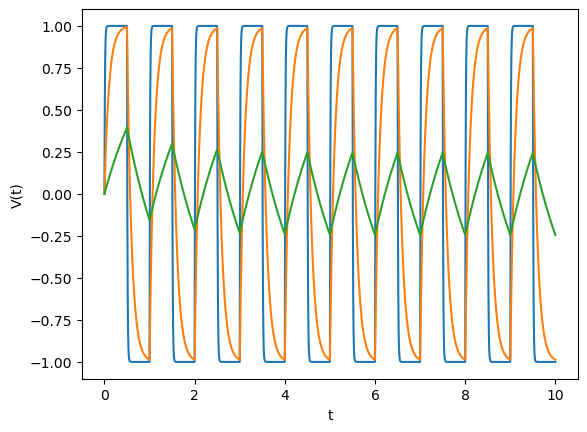

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# the equation to use: Vout_new(t) = 1/(RC) * (V_in - V_out)

# Constants
N = 10000
V_out = 0
t_ten = 10 
t_zero = 0     # filter circuit from t = 0 to t = 10
h = (t_ten - t_zero)/N

def V_in(t):
    if np.floor(2*t) % 2 == 0:   # V_in as defined in problem
        return 1     # if 2t is even give 1
    else:
        return -1    # if 2t is odd give -1

def f(V, t, RC):
    return 1/ RC*(V_in(t) - V)

def g(RC):
    V_array = []
    t_list = np.arange(t_zero, t_ten, h)
    V = V_out
    for t in t_list:
        V_array.append(V)
        k1 = h * f(V, t, RC)
        k2 = h * f(V + 0.5 * k1, t + 0.5 * h, RC)
        k3 = h * f(V + 0.5 * k2, t + 0.5 * h, RC)
        k4 = h * f(V + k3, t + h, RC)
        V +=  (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return V_array

t = np.arange(t_zero, t_ten, h)

plt.plot(t, g(0.01))             # RC = 0.01, 0.1, and 1, with initial condition Vout(0) = 0
plt.plot(t, g(0.1))
plt.plot(t, g(1))
plt.xlabel('t')
plt.ylabel('V(t)')
plt.show()


In [2]:
# The cutoff frequency of low-pass filter decreases as RC increases.
# Low frequencies can go through the filter more easily.
# Looks like the square wave is also made smooth.

## 8.2:

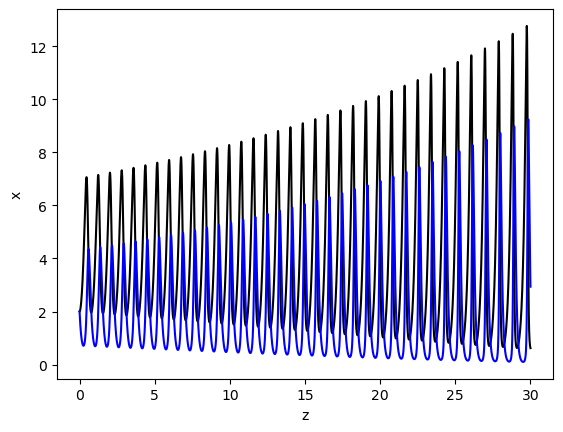

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 1               # alpha = 1
beta = 0.5              # beta = 0.5
gamma = 0.5             # gamma = 0.5
delta = 2               # delta = 2

x_initial = 2           # initial condition x = y = 2
y_initial = 2

# book-
# Have the program make a graph showing both x and y as a function of time on the same
# axes from t = 0 to t = 30.

N = 30000 # with 10000 this doesnt make nice plot
t_zero = 0
t_thirty = 30
h = (t_thirty - t_zero) / N

# given:
def fx(x, y):
    return alpha * x - beta * x*y     # dx/dt = alpha * x − beta * xy

def fy(x, y):
    return gamma * x*y - delta * y    # dy/dt = gamma * xy − delta * y,

# book-
# Notice that the differential equations in this case do not
# depend explicitly on time t—in vector notation, the right-hand side of each equation is a
# function f (r) with no t dependence

def f(r):
    x = r[0]
    y = r[1]
    return np.array([fx(x, y), fy(x, y)], float)

x_array = []
y_array = []
t_range = np.arange(t_zero, t_thirty, h)
r = np.array([x_initial, y_initial], float)

for t in t_range:
    x_array.append(r[0])
    y_array.append(r[1])
    k1 = h * f(r)
    k2 = h * f(r+0.5 * k1)
    k3 = h * f(r+0.5 * k2)
    k4 = h * f(r+k3)
    r += (k1+2 * k2+2 * k3+k4)

plt.plot(t_range, x_array, 'k')
plt.plot(t_range, y_array, 'b')
plt.xlabel('z')
plt.ylabel('x')
plt.show()


In [4]:
# When rabbit population is large due to resources, fox population increases,
# which means more rabbits are eaten, leading to decrease in population.
# This leads to less rabbits, less rabbits to eat means decrease in fox population.
# This makes the circular pattern for fox and rabbit populations.

## 8.3:

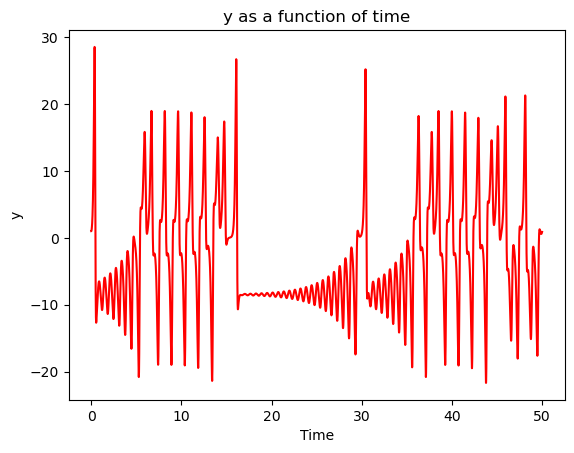

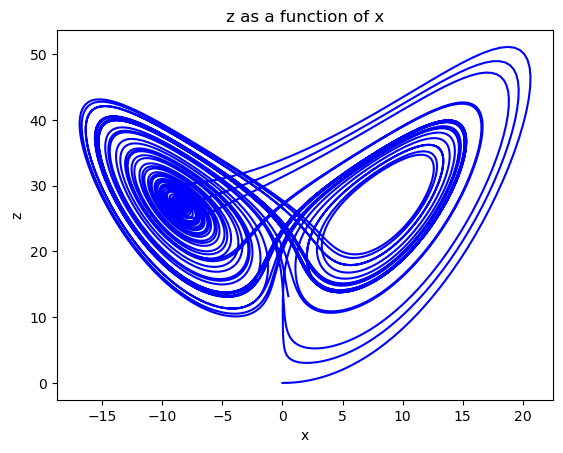

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# given constants
sigma = 10
r = 28
b = 8/3
t_i = 0
t_f = 50
x_initial = 0 
y_initial = 1  
z_initial = 0 
N = 10000
h = (t_f - t_i) / N

def f_x(x, y, z):                # dx/dt equation
    return sigma*(y-x)

def f_y(x, y, z):                # dy/dt equation
    return r*x - y - x*z

def f_z(x, y, z):                # dz/dt equation
    return x*y - b*z

def f(r):
    x, y, z = r
    return np.array([f_x(x,y,z), f_y(x,y,z), f_z(x,y,z)], float)

t_list = np.arange(t_i, t_f, h)
x_array = []
y_array = []
z_array = []
R = np.array([x_initial, y_initial, z_initial], float)


for t in t_list:
    x_array.append(R[0])
    y_array.append(R[1])
    z_array.append(R[2])
    k1 = h * f(R)
    k2 = h * f(R + 0.5 * h * k1)
    k3 = h * f(R + 0.5 * h * k2)
    k4 = h * f(R + h * k3)
    R += (k1 + 2 * k2 + 2 * k3 + k4) / 6


plt.plot(t_list, y_array, 'r')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('y as a function of time')
plt.show()

plt.plot(x_array, z_array, 'b')
plt.xlabel('x')
plt.ylabel('z')
plt.title('z as a function of x')

plt.show()

## 8.5:

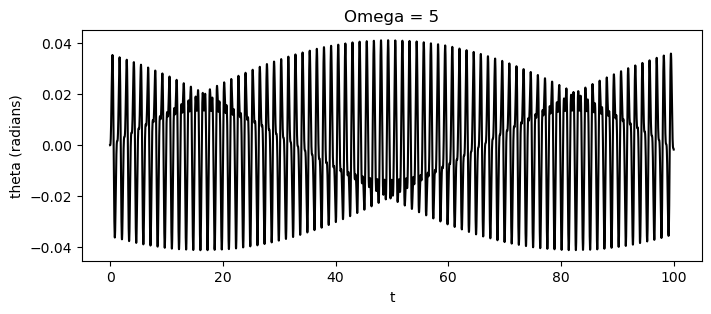

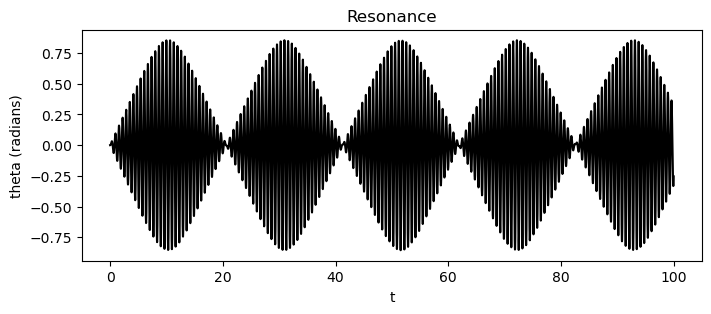

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# given constants
l = 0.1  # 10 cm to m
C = 2  # s^-2
theta_0 = 0.0 
omega_0 = 0.0
t_initial = 0.0   # given initial range
t_final = 100 # given end range
g = 9.81
N = 5000  
h = (t_final - t_initial) / N

def f(r, t, Omega):       # given function = -g/l * sin(theta) + C*cos(theta) * sin(omega*t)
    theta = r[0]
    omega = r[1]   # careful of capital vs lowercase Omega/omega here
    return np.array([omega, -(g/l) * np.sin(theta) + C*np.cos(theta) * np.sin(Omega*t)], float)

def theta(Omega):
    t_range = np.arange(t_initial, t_final, h)
    theta_array = []
    r = np.array([theta_0, omega_0], float)
    
    for t in t_range:
        theta_array.append(r[0])
        k1 = h * f(r, t, Omega)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h, Omega)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h, Omega)
        k4 = h * f(r + k3, t + h, Omega)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return theta_array

t_range = np.arange(t_initial, t_final, h)

# part a:
plt.figure(figsize=(8, 3))
plt.plot(t_range, theta(5), 'k')
plt.xlabel('t')
plt.ylabel('theta (radians)')
plt.title('Omega = 5')
plt.show()

# part b:
resonance = np.sqrt(g / l)  # Resonance frequency

plt.figure(figsize=(8, 3))
plt.plot(t_range, theta(resonance), 'k')
plt.xlabel('t')
plt.ylabel('theta (radians)')
plt.title('Resonance')
plt.show()

## 8.12:

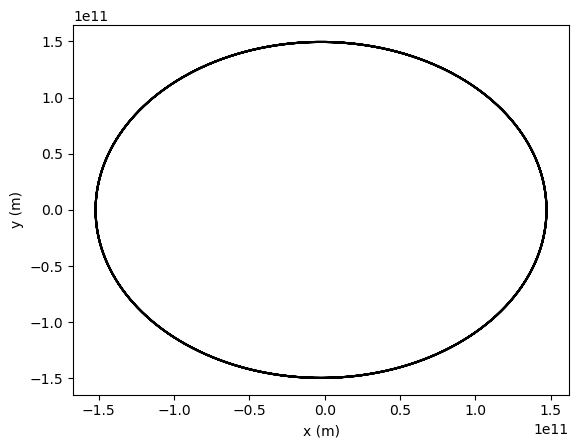

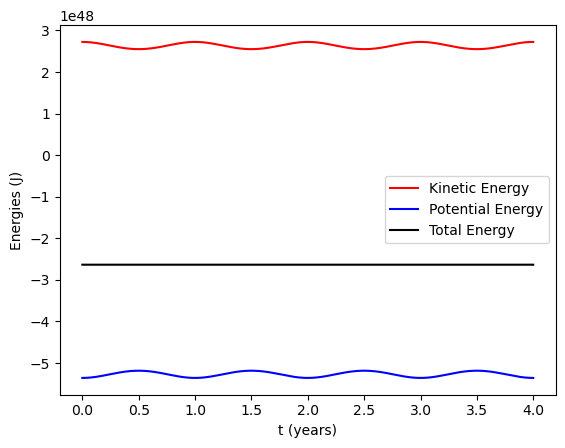

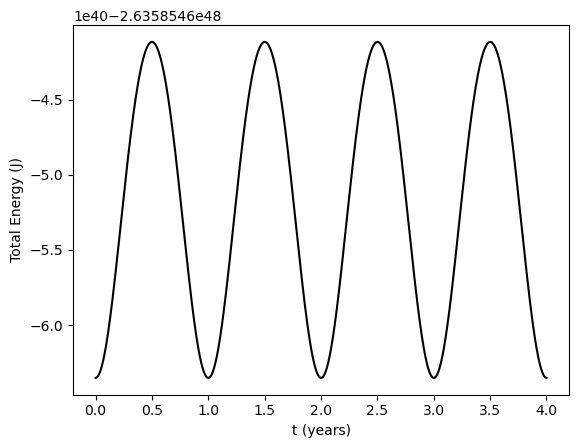

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
perihelion_distance = 1.4710 * 10 ** 11  # meters
perihelion_velocity = 0  # m/s
initial_x = perihelion_distance
initial_vx = perihelion_velocity
initial_y = 0
initial_vy = 3.0287 * 10 ** 4 * 8760 * 60 * 60  # m/yr converted to m/s
t_0 = 0  # initial time (years)
t_f = 4  # final time (years)
time_step = 1 / 8760  # time step (1 hour in years)
G = 6.6738 * 10 ** -11 * (8760 * 60 * 60) ** 2  # m^3 kg^-1 yr^-2
M = 1.9891 * 10 ** 30  # Mass of the Sun (kg)
m = 5.9722 * 10 ** 24  # Mass of the Earth (kg)


def f(r):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    dist = np.sqrt(x ** 2 + y ** 2)
    return np.array([vx, -G*M*x / dist**3, vy, -G*M*y / dist**3], float)


# Calculate orbit
tpoints = np.arange(t_0, t_f, time_step)
xpoints = []
ypoints = []
potential_energy = []
kinetic_energy = []

r = np.array([initial_x, initial_vx, initial_y, initial_vy], float)


f_mid = 0.5 * time_step * f(r)

vx_mid = r[1] + f_mid[1]
vy_mid = r[3] + f_mid[3]

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[2])
    kinetic_energy.append(0.5 * m * (r[1] ** 2 + r[3] ** 2))
    potential_energy.append(-G * M * m / np.sqrt(r[0] ** 2 + r[2] ** 2))
    r[0] += time_step * vx_mid
    r[2] += time_step * vy_mid
    k = time_step * f(r)
    r[1] = vx_mid + 0.5 * k[1]
    r[3] = vy_mid + 0.5 * k[3]
    f_mid = 0.5 * time_step * f(r)
    vx_mid += k[1]
    vy_mid += k[3]


# Plot orbit
plt.plot(xpoints, ypoints, 'k')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()


# Plot energies
total_energy = np.array(kinetic_energy, float) + np.array(potential_energy, float)
plt.plot(tpoints, kinetic_energy, 'r', label='Kinetic Energy')
plt.plot(tpoints, potential_energy, 'b', label='Potential Energy')
plt.plot(tpoints, total_energy, 'k', label='Total Energy')
plt.xlabel('t (years)')
plt.ylabel('Energies (J)')
plt.legend()
plt.show()

# Plot total energy
plt.plot(tpoints, total_energy, 'k')
plt.xlabel('t (years)')
plt.ylabel('Total Energy (J)')
plt.show()

## 8.16: 

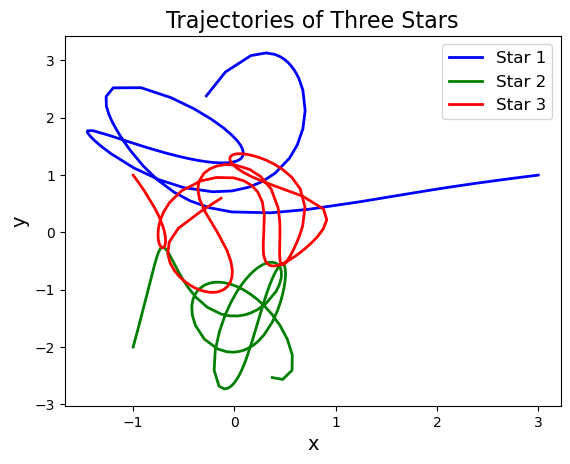

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# given constants
G = 1
m1, m2, m3 = 150, 200, 250
x1_0, y1_0 = 3, 1
x2_0, y2_0 = -1, -2
x3_0, y3_0 = -1, 1
vx1_0, vy1_0 = 0, 0
vx2_0, vy2_0 = 0, 0
vx3_0, vy3_0 = 0, 0
t_0, t_f = 0, 2  


# initial eq
def f(r, t):
    x1, vx1, y1, vy1, x2, vx2, y2, vy2, x3, vx3, y3, vy3 = r
    r12 = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    r23 = np.sqrt((x3-x2)**2 + (y3-y2)**2)
    r13 = np.sqrt((x1-x3)**2 + (y1-y3)**2)
    return np.array([
        vx1,
        G*m2 * (x2-x1)/r12**3 + G*m3 * (x3-x1) / r13**3,
        vy1,
        G*m2 * (y2-y1)/r12**3 + G*m3 * (y3-y1) / r13**3,
        vx2,
        G*m1 * (x1-x2)/r12**3 + G*m3 * (x3-x2) / r23**3,
        vy2,
        G*m1 * (y1-y2)/r12**3 + G*m3 * (y3-y2) / r23**3,
        vx3,
        G*m1 * (x1-x3)/r13**3 + G*m2 * (x2-x3) / r23**3,
        vy3,
        G*m1 * (y1-y3)/r13**3 + G*m2 * (y2-y3) / r23**3
    ], float)


# Runge-Kutta 
def runge_kutta_step(r, t, h):
    k1 = h * f(r, t)
    k2 = h * f(r+0.5*k1, t+0.5 * h)
    k3 = h * f(r+0.5*k2, t+0.5 * h)
    k4 = h * f(r+k3, t + h)
    return (k1+ 2*k2 + 2*k3 + k4) / 6


# adaptive time step
def time_step(r, t, h):
    delta_step_1 = runge_kutta_step(r, t, h)
    delta_step_2 = runge_kutta_step(r + delta_step_1, t + h, h)
    delta_r1 = delta_step_1 + delta_step_2
    delta_r2 = runge_kutta_step(r, t, 2 * h)

    delta_x1_m1 = delta_r1[0]
    delta_y1_m1 = delta_r1[2]
    delta_x2_m1 = delta_r2[0]
    delta_y2_m1 = delta_r2[2]
    error_m1 = np.sqrt((delta_x1_m1 - delta_x2_m1)**2 + (delta_y1_m1 - delta_y2_m1)**2) / 30

    delta_x1_m2 = delta_r1[4]
    delta_y1_m2 = delta_r1[6]
    delta_x2_m2 = delta_r2[4]
    delta_y2_m2 = delta_r2[6]
    error_m2 = np.sqrt((delta_x1_m2 - delta_x2_m2)**2 + (delta_y1_m2 - delta_y2_m2)**2) / 30

    delta_x1_m3 = delta_r1[8]
    delta_y1_m3 = delta_r1[10]
    delta_x2_m3 = delta_r2[8]
    delta_y2_m3 = delta_r2[10]
    error_m3 = np.sqrt((delta_x1_m3 - delta_x2_m3)**2 + (delta_y1_m3 - delta_y2_m3)**2) / 30

    error = max(error_m1, error_m2, error_m3)
    delta = 0.001  # Error per unit time
    rho = h * delta / error
    factor = np.power(rho, 1 / 4)

    if rho >= 1:
        t = t + 2 * h
        if factor > 2:
            h *= 1.5
        else:
            h *= factor

        delta_r1[0] += (delta_x1_m1 - delta_x2_m1) / 15
        delta_r1[2] += (delta_y1_m1 - delta_y2_m1) / 15
        delta_r1[4] += (delta_x1_m2 - delta_x2_m2) / 15
        delta_r1[6] += (delta_y1_m2 - delta_y2_m2) / 15
        delta_r1[8] += (delta_x1_m3 - delta_x2_m3) / 15
        delta_r1[10] += (delta_y1_m3 - delta_y2_m3) / 15
        return delta_r1, h, t
    else:
        return time_step(r, t, factor * h)


h = (t_f - t_0) / 400000  
tpoints = []
xpoints1 = []
ypoints1 = []
xpoints2 = []
ypoints2 = []
xpoints3 = []
ypoints3 = []
r = [x1_0, vx1_0, y1_0, vy1_0, x2_0, vx2_0, y2_0, vy2_0, x3_0, vx3_0, y3_0, vy3_0]  # Initial conditions
t = t_0

while t < t_f:
    tpoints.append(t)
    xpoints1.append(r[0])
    ypoints1.append(r[2])
    xpoints2.append(r[4])
    ypoints2.append(r[6])
    xpoints3.append(r[8])
    ypoints3.append(r[10])
    delta_r, h, t = time_step(r, t, h)
    r = [r[i] + delta_r[i] for i in range(len(r))]

# plot
plt.plot(xpoints1, ypoints1, 'b', label='Star 1', linewidth=2)  
plt.plot(xpoints2, ypoints2, 'g', label='Star 2', linewidth=2)  
plt.plot(xpoints3, ypoints3, 'r', label='Star 3', linewidth=2)  
plt.xlabel('x', fontsize=14)  
plt.ylabel('y', fontsize=14)  
plt.title('Trajectories of Three Stars', fontsize=16)  
plt.legend(fontsize=12)  
plt.show()
